## Imports:

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Conv2D, MaxPool2D , Dropout , Flatten , Dense , Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,plot_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

## Downloading Data:

In [ ]:
%%capture
!rm -vr ~/.kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
!chmod 777 ~/.kaggle/kaggle.json!rm -vr ~/.kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
!chmod 777 ~/.kaggle/kaggle.json

In [ ]:
api_token = {"username":"yoyaadel","key":"268cb7d170de44381b8f8c02b2b74f72"}

import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
%%capture
!kaggle datasets download -d datamunge/sign-language-mnist
!unzip /content/sign-language-mnist.zip

# DataSet:

In [ ]:
df_train =pd.read_csv("sign_mnist_train.csv")
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
df_test =pd.read_csv("sign_mnist_test.csv")
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
df_train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [ ]:
df_test.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_test.duplicated().sum()

0

# Sign Language:

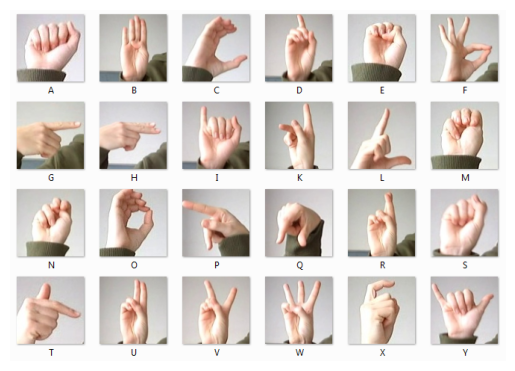

In [ ]:
file='/content/amer_sign2.png'
sign_lang = cv2.imread(file)
image = cv2.cvtColor(sign_lang, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

# Modeling:

In [ ]:
features = df_train.drop(['label'], axis = 1)
labels = df_train['label']
features_test = df_test.drop(['label'], axis = 1)
labels_test = df_test['label']
features = np.array(features,dtype='float32')/255
features_test = np.array(features_test,dtype='float32')/255

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels_test = lb.fit_transform(labels_test)

In [ ]:
features = features.reshape(-1,28,28,1)
features_test = features_test.reshape(-1,28,28,1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(features,labels, test_size = 0.1)

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.2,
        width_shift_range=0.1,
        height_shift_range=0.1)

datagen.fit(X_train)

In [ ]:
model = Sequential()
model.add(Conv2D(45, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), strides = 1, padding = 'same'))

model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same'))

model.add(Conv2D(55, kernel_size=(3,3), strides=1, padding='same', activation='relu'))

model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=24,activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist= model.fit(datagen.flow(X_train, y_train, batch_size=128), epochs=10, validation_data = (X_val,y_val))

Epoch 1/10
194/194 [==============================] - 21s 47ms/step - loss: 1.4268 - accuracy: 0.5726 - val_loss: 3.0492 - val_accuracy: 0.0688
Epoch 2/10
194/194 [==============================] - 8s 40ms/step - loss: 0.5708 - accuracy: 0.8150 - val_loss: 2.5053 - val_accuracy: 0.1249
Epoch 3/10
194/194 [==============================] - 9s 45ms/step - loss: 0.3478 - accuracy: 0.8865 - val_loss: 0.5858 - val_accuracy: 0.8128
Epoch 4/10
194/194 [==============================] - 9s 44ms/step - loss: 0.2524 - accuracy: 0.9177 - val_loss: 0.1446 - val_accuracy: 0.9552
Epoch 5/10
194/194 [==============================] - 9s 45ms/step - loss: 0.1897 - accuracy: 0.9380 - val_loss: 0.1208 - val_accuracy: 0.9618
Epoch 6/10
194/194 [==============================] - 8s 39ms/step - loss: 0.1601 - accuracy: 0.9507 - val_loss: 0.0755 - val_accuracy: 0.9720
Epoch 7/10
194/194 [==============================] - 10s 51ms/step - loss: 0.1424 - accuracy: 0.9543 - val_loss: 0.0580 - val_accuracy: 0.98

In [ ]:
print("Accuracy of the model is - " , model.evaluate(features_test,labels_test)[1]*100 , "%")

225/225 [==============================] - 1s 3ms/step - loss: 0.0940 - accuracy: 0.9671
Accuracy of the model is -  96.70942425727844 %


In [ ]:
model.save('sign_detection.h5')